# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [1]:
# откройте данные: ваш код здесь
import warnings
warnings.filterwarnings('ignore')

import pandas as pd


raw_data = pd.read_csv('data/spam_or_not_spam.csv')
raw_data.sample(10)

,email,label
2739,dear sir or madam in the past you have reques...,1
2068,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0
1779,forwarded by sven guckes guckes math fu berli...,0
1379,don newcomer wrote i m a new user or about to ...,0
1601,i noticed a drop in checks and did some tests ...,0
14,spamassassin is hurting democracy owen URL int...,0
2980,gbNUMBER b ynwNUMBERsquNUMBERruNUMBERnbqufqNU...,1
343,justin mason writes has anyone figured out wha...,0
1140,begin pgp signed message hash shaNUMBER in ar...,0
750,on mon NUMBER sep NUMBER gordon mohr wrote the...,0


In [2]:
# рассчитайте частоты для классов : ваш код здесь
display(raw_data.groupby('label').count())
display(raw_data['label'].value_counts())
display(raw_data['label'].value_counts(normalize=True) * 100)

,email
label,
0,2500
1,499


0    2500
1     500
Name: label, dtype: int64

0    83.333333
1    16.666667
Name: label, dtype: float64

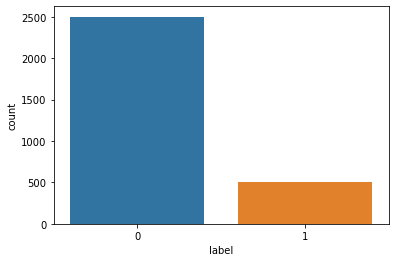

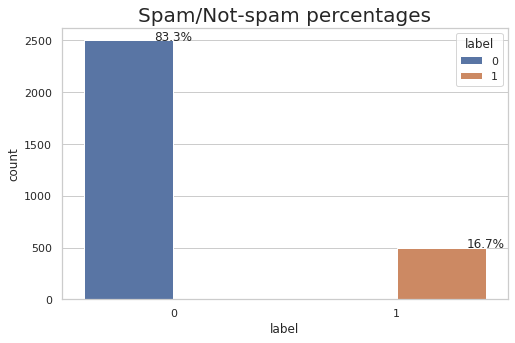

In [3]:
# визуализируйте результат: ваш код здесь
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data=raw_data, x='label')
plt.show()

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(raw_data))
ax = sns.countplot(x="label", hue="label", data=raw_data)
plt.title('Spam/Not-spam percentages', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [5]:
#ваш код здесь
import numpy as np


data = raw_data.copy(deep=True)

# data['email'] = data['email'].replace(r'^\s*$', np.nan, regex=True)
data = data.replace('', np.nan)
display(data.isna().sum())
display(data[data['email'].isna()])
display(data.shape)

data = data.dropna(axis=0)
display(data.isna().sum())
display(data[data['email'].isna()])
display(data.shape)

email    1
label    0
dtype: int64

,email,label
2966,NaN,1


(3000, 2)

email    0
label    0
dtype: int64

,email,label


(2999, 2)

Переводим данные в векторный вид:

In [6]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [7]:
#ваш код здесь
X_vectorized.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [8]:
#ваш код здесь
X = pd.DataFrame(X_vectorized.todense()).reset_index(drop=True)
y = data['label'].reset_index(drop=True)
display(f"type(X) = {type(X)}, shape = {X.shape}")
display(X.tail(5))
display(f"type(y) = {type(y)}, shape = {y.shape}, unique = {np.unique(y)}")
display(y.tail(5))
Xy_data = pd.concat([X, y], axis=1)
display(Xy_data.tail(5))

# X = Xy_data.drop(['label'], axis=1)
# y = Xy_data['label']

"type(X) = <class 'pandas.core.frame.DataFrame'>, shape = (2999, 34116)"

,0,1,2,3,4,5,6,7,8,9,...,34106,34107,34108,34109,34110,34111,34112,34113,34114,34115
2994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


"type(y) = <class 'pandas.core.series.Series'>, shape = (2999,), unique = [0 1]"

2994    1
2995    1
2996    1
2997    1
2998    1
Name: label, dtype: int64

,0,1,2,3,4,5,6,7,8,9,...,34107,34108,34109,34110,34111,34112,34113,34114,34115,label
2994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [9]:
#ваш код здесь

from sklearn import model_selection
from IPython.display import display, HTML

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

# -----

display(X_train.shape)
display(y_train.shape)
_, train_counts = np.unique(y_train, return_counts=True)
display(HTML(f"{np.round( (train_counts / np.sum(train_counts)) * 100, 2)} %"))
display(HTML('----------'))
display(X_test.shape)
display(y_test.shape)
_, test_counts = np.unique(y_test, return_counts=True)
display(HTML(f"{np.round( (test_counts / np.sum(test_counts)) * 100, 2)} %"))

(2249, 34116)

(2249,)

(750, 34116)

(750,)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [10]:
#ваш код здесь
np.mean(y_test)

0.164

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [11]:
#ваш код здесь
from sklearn import naive_bayes

model_MultinomialNB = naive_bayes.MultinomialNB(alpha=0.01)
model_MultinomialNB.fit(X_train, y_train)

model_ComplementNB = naive_bayes.ComplementNB(alpha=0.01)
model_ComplementNB.fit(X_train, y_train)

models = [model_MultinomialNB, model_ComplementNB]

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [12]:
#ваш код здесь
from sklearn import metrics

for model in models:
    display(HTML(f"<u><b>Model type: {model}</b></u>"))
    display(HTML(f"Train set metrics:"))
    y_train_pred = model.predict(X_train)
    display(HTML(f"Train Accuracy: {metrics.accuracy_score(y_train, y_train_pred)}"))
    display(HTML(f"Train Precision: {metrics.precision_score(y_train, y_train_pred)}"))
    display(HTML(f"Train Recall: {metrics.recall_score(y_train, y_train_pred)}"))
    display(HTML(f"Train F1-score: {metrics.f1_score(y_train, y_train_pred)}"))
    display(HTML('----------'))
    display(HTML(f"Test set metrics:"))
    y_test_pred = model.predict(X_test)
    display(HTML(f"Test Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}"))
    display(HTML(f"Test Precision: {metrics.precision_score(y_test, y_test_pred)}"))
    display(HTML(f"Test Recall: {metrics.recall_score(y_test, y_test_pred)}"))
    display(HTML(f"Test F1-score: {metrics.f1_score(y_test, y_test_pred)}"))
    display(HTML('=========='))

display(HTML('<strong>Вывод: Модели примерно одинаковые на рассмотренном примере. Чуть "получше" (в тысячных) модель MultinomialNB, но на платформе подходят ответы для ComplementNB.</strong>'))

Нарисуйте ROC-кривую:

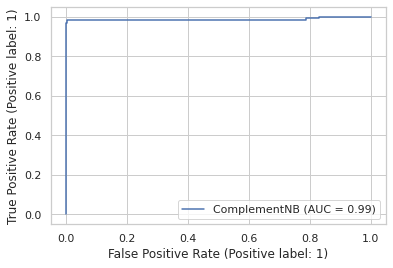

In [13]:
metrics.plot_roc_curve(model_ComplementNB, X_test, y_test)

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

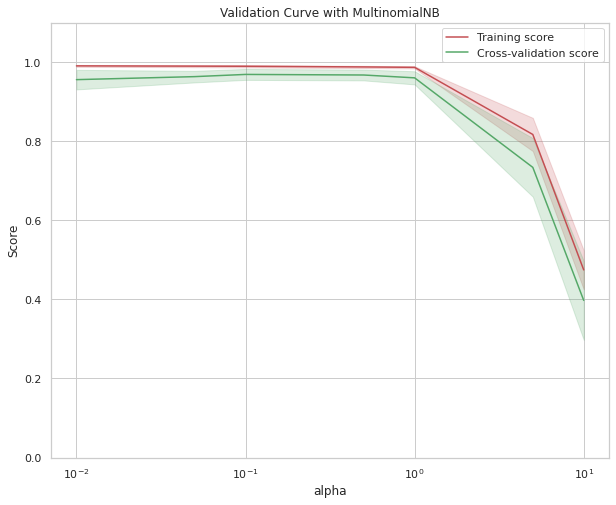

In [14]:
#ваш код здесь
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

param_range=np.array([0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10])
train_scores, valid_scores = validation_curve(
    naive_bayes.MultinomialNB(), X_train, y_train,
    param_name="alpha", param_range=param_range,
    scoring='f1',
    cv=5,
    n_jobs=4
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10, 8))
plt.title("Validation Curve with MultinomialNB")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

**Вывод:** классификатор `MultinomialNB` практически не зависит от параметра `alpha` в пределах от 0 до 1. При значениях `alpha` больших единицы качество классификации сильно падает. Значения порядка 0.1 может являться оптимальным.